In [1]:
# Lab | Cleaning numerical data
# For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in 
#files_for_lab folder.

# Context
# An auto insurance company has collected some data about its customers 
#including their demographics, education, employment, policy details, 
#vehicle information on which insurance policy is, and claim amounts. 
#You will help the senior management with some business questions 
#that will help them to better understand their customers, 
#improve their services, and improve profitability.

# Some business Objectives:

# Retain customers,
# Analyze relevant customer data,
# Develop focused customer retention programs.
# Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.


In [2]:
# Instructions
# 1 Import the necessary libraries.
# 2 Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df
# 3 First look at its main features (head, shape, info).

# 4 Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

# 5 Change effective to date column to datetime format.

# 6 Define a function that differentiates between continuous and discrete variables. 
# Hint: The number of unique values might be useful. 
#Store continuous data into a continuous_df variable and do the same for discrete_df

# 7 Plot a correlation matrix, comment what you see.

# 8 Create a function to plot every discrete variable. Do the same with the continuous variables 
#(Be Careful, you may need to change the plot type to one better suited for continuous data!)

# 9 Comment what you can see in the plots.

# 10 Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

# 11 Did you find outliers? Comment what you will do with them.

# 12 Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [3]:
# 1 Import the necessary libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# 2 Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(data.shape)
data.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
# 4 Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)
# 4 Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)
# 5 Change effective to date column to datetime format.
# 6 Define a function that differentiates between continuous and discrete variables. 
# Hint: The number of unique values might be useful. 
#Store continuous data into a continuous_df variable and do the same for discrete_df
# 7 Plot a correlation matrix, comment what you see.
# 8 Create a function to plot every discrete variable. Do the same with the continuous variables 
#(Be Careful, you may need to change the plot type to one better suited for continuous data!)
# 9 Comment what you can see in the plots.
# 10 Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)
# 11 Did you find outliers? Comment what you will do with them.
# 12 Check all columns for NaN values. Decide what (if anything) you will need to do with them.


In [6]:
# data.columns = [col.lower() for col in data.columns]
# display(data.shape)
# data.head()

In [7]:
data.columns= data.columns.str.strip().str.lower()
data.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size'],
      dtype='object')

In [8]:
data.columns = map(lambda x : x.replace("-", "_").replace(" ", "_"), df.columns)

NameError: name 'df' is not defined

In [9]:
def function_1(x):
    x = x.split('_')[0]
    return x
data.rename(columns=function_1).head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [10]:
data.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size'],
      dtype='object')

In [11]:
data.rename(inplace=True, columns={'customer lifetime value': 'customer_lifetime_value', 'effective to date': 'effective_to_date','months since policy inception': 'months_since_policy_inception','number of open complaints': 'number_of_open_complaints', 'number of policies':'number_of_policies','policy type':'policy_type','renew offer type':'renew_offer_type',  })
print(data)

     customer       state  customer_lifetime_value response  coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     education effective_to_date employmentstatus gender  income  ...  \
0     Bachelor           2/24/11         Employed 

In [12]:
display(data.shape)
data.head()

(9134, 24)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [13]:
data.rename(inplace=True, columns={'sales channel': 'sales_channel', 'total claim amount': 'total_claim_amount','vehicle class': 'vehicle_class','vehicle size': 'vehicle_size', 'employmentstatus':'employment_status','policy type':'policy_type','renew offer type':'renew_offer_type'})
print(data)

     customer       state  customer_lifetime_value response  coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     education effective_to_date employment_status gender  income  ...  \
0     Bachelor           2/24/11          Employe

In [14]:
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [15]:
data.rename(inplace=True, columns={'location code': 'location_code', 'marital status': 'marital_status','monthly premium auto': 'monthly_premium_auto','months since last claim': 'months_since_last_claim'})
print(data)

     customer       state  customer_lifetime_value response  coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     education effective_to_date employment_status gender  income  ...  \
0     Bachelor           2/24/11          Employe

In [16]:
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [17]:
# 5 Change effective to date column to datetime format.

In [18]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])

In [19]:
display(data.shape)
data.head()

(9134, 24)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [21]:
# 6 Define a function that differentiates between continuous and discrete variables. 
# Hint: The number of unique values might be useful. 
#Store continuous data into a continuous_df variable and do the same for discrete_df
categorical = data.select_dtypes(include=object)
numerical = data.select_dtypes(include=np.number)
display(numerical.nunique())
numerical.info()


customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


In [ ]:
# Discrete variables represent counts (e.g., the number of objects in a collection).
# Continuous variables represent measurable amounts (e.g., water volume or weight).

In [ ]:
discrete_var = []
continuous_var = []
for col in numerical.columns:
    if len(numerical[col].unique()) < 200:
        discrete_var.append(col)
    else:
        continuous_var.append(col)
display(discrete_var)
display(continuous_var)

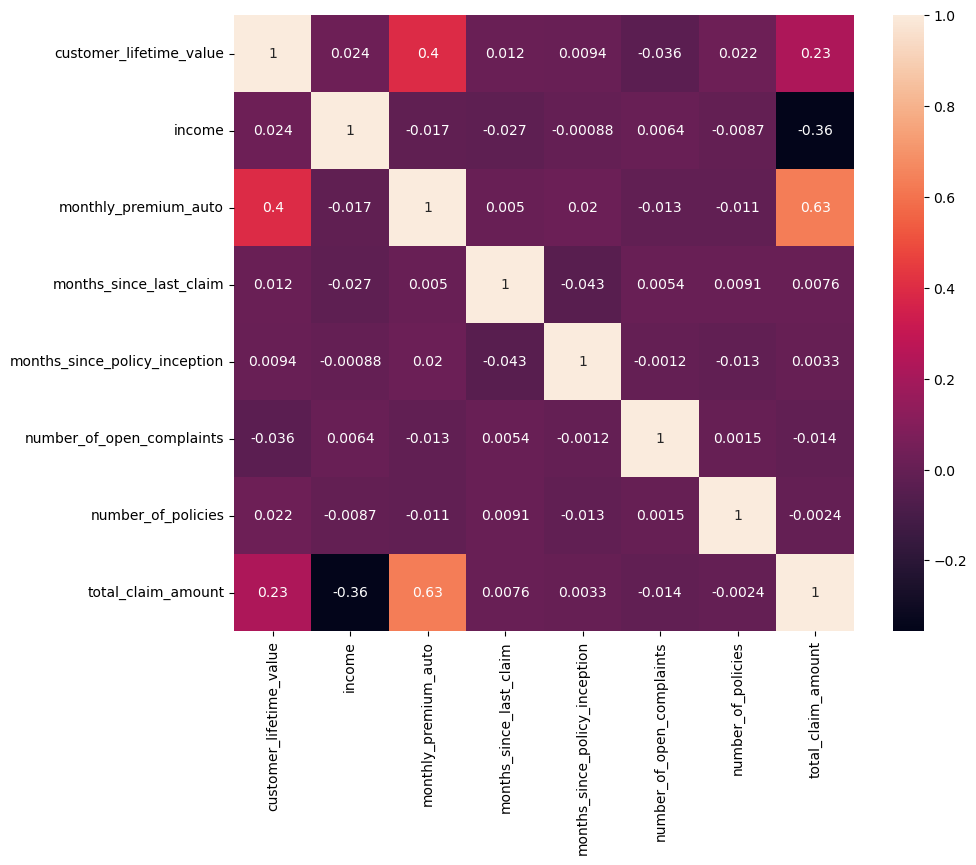

In [22]:
# 7 Plot a correlation matrix, comment what you see.
corr_matrix=data.corr()
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()


In [23]:
# 8 Create a function to plot every discrete variable. Do the same with the continuous variables 
#(Be Careful, you may need to change the plot type to one better suited for continuous data!)



In [24]:
def is_continous(dataframe, total_rows):
    if dataframe.dtype == float or dataframe.dtype == datetime.datetime
        return True
    if dataframe.dtype == int and ({dataframe.nunique{} / total_rows} * 100 >3):
        return True
    return False


continous_variables = []
discrete_variables = []

for col_name in customer_df.columns:
    if is_continous(customer_df[col_name], len(customer_df[col_name])) == True:
        continous_variables.append[col_name]
    else:
        discrete_variables.append(col_name) = []
        
        
print(continous_variables)
print('----------------')        
print(discrete_variables)        
    

SyntaxError: invalid syntax (4102518334.py, line 2)

In [ ]:
# 9 Comment what you can see in the plots.
# 10 Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)
# 11 Did you find outliers? Comment what you will do with them.
# 12 Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [26]:
# Base libraries
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import BASE_COLORS

%matplotlib inline

#warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [27]:
# customer_df = pd.read_csv("data/we_fn_use_c_marketing_customer_value_analysis.csv")
# 2 Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [28]:
customer_df.head(5)


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [29]:
customer_df.shape

(9134, 24)

In [30]:

customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [31]:
new_cols = [col.replace(" ", "_").lower() for col in customer_df]
customer_df.columns = new_cols

In [32]:
# date column to datetime format
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

In [33]:
#Check NaNs Total
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [34]:

# Check NaNs (Percentage)
customer_df.isna().sum()/len(customer_df)

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

In [35]:
customer_df.describe()


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [36]:

# Income variable first quartil == min. Too many zeros. 
customer_df['income'].value_counts()
#Length: n. of unique values

0        2317
95697      12
27972       7
25370       7
61108       7
         ... 
36529       1
25859       1
38179       1
70190       1
21941       1
Name: income, Length: 5694, dtype: int64

In [37]:

#replace zeros with median
median_income=customer_df['income'].median(skipna=True)
customer_df['income']=customer_df.income.mask(customer_df.income==0,median_income)

In [38]:

customer_df['income'].value_counts()


33889.5    2317
95697.0      12
27972.0       7
25370.0       7
61108.0       7
           ... 
36529.0       1
25859.0       1
38179.0       1
70190.0       1
21941.0       1
Name: income, Length: 5694, dtype: int64

In [39]:

numericals = customer_df.select_dtypes(np.number)
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274.0,69,32,5,0,1,384.811147
1,6979.535903,33889.5,94,13,42,0,8,1131.464935
2,12887.431650,48767.0,108,18,38,0,2,566.472247
3,7645.861827,33889.5,106,18,65,0,7,529.881344
4,2813.692575,43836.0,73,12,44,0,1,138.130879


In [40]:
#the discrete variables will be likely the ones with less unique values
numericals.nunique()


customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

In [41]:

discrete = [i for i in numericals if (len(numericals[i].unique()) < (numericals.shape[0] * 0.01))]

In [42]:

discrete


['months_since_last_claim', 'number_of_open_complaints', 'number_of_policies']

In [43]:

continuous = list(numericals.drop(columns = discrete).columns)


In [44]:

continuous


['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_policy_inception',
 'total_claim_amount']

In [ ]:
# 1.Import the necessary libraries if you are starting a new notebook. Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv
# 2.Find all of the categorical data. Save it in a categorical_df variable.
# 3.Check for NaN values.
# 4.Check all unique values of columns.
# 5.Check dtypes. Do they all make sense as categorical data?
# 6.Does any column contain alpha and numeric data? Decide how to clean it.
# 7.Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.
# 8.Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?
# 9.Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

In [45]:

customer_df.head()


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274.0,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,33889.5,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767.0,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,33889.5,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836.0,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [ ]:
# 2.Find all of the categorical data. Save it in a categorical_df variable.
# 3.Check for NaN values.
# 4.Check all unique values of columns.
# 5.Check dtypes. Do they all make sense as categorical data?
# 6.Does any column contain alpha and numeric data? Decide how to clean it.
# 7.Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.
# 8.Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?
# 9.Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

In [46]:
categorical = customer_df.select_dtypes(object)

In [47]:

categorical.nunique()

customer            9134
state                  5
response               2
coverage               3
education              5
employmentstatus       5
gender                 2
location_code          3
marital_status         3
policy_type            3
policy                 9
renew_offer_type       4
sales_channel          4
vehicle_class          6
vehicle_size           3
dtype: int64

In [48]:

categorical_columns = [i for i in categorical if (len(categorical[i].unique()) < (numericals.shape[0] * 0.01))]


In [49]:
#no customer_id anymore
categorical_columns


['state',
 'response',
 'coverage',
 'education',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

In [50]:

categorical_df=customer_df[categorical_columns]

In [51]:
categorical_df


,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [53]:
continuous_df = numericals.drop(columns = discrete)


In [54]:

continuous_df.head()


,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274.0,69,5,384.811147
1,6979.535903,33889.5,94,42,1131.464935
2,12887.431650,48767.0,108,38,566.472247
3,7645.861827,33889.5,106,65,529.881344
4,2813.692575,43836.0,73,44,138.130879


In [55]:


discrete_df = numericals[discrete]


In [56]:

discrete_df


,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1
...,...,...,...
9129,18,0,2
9130,14,0,1
9131,9,3,2
9132,34,0,3


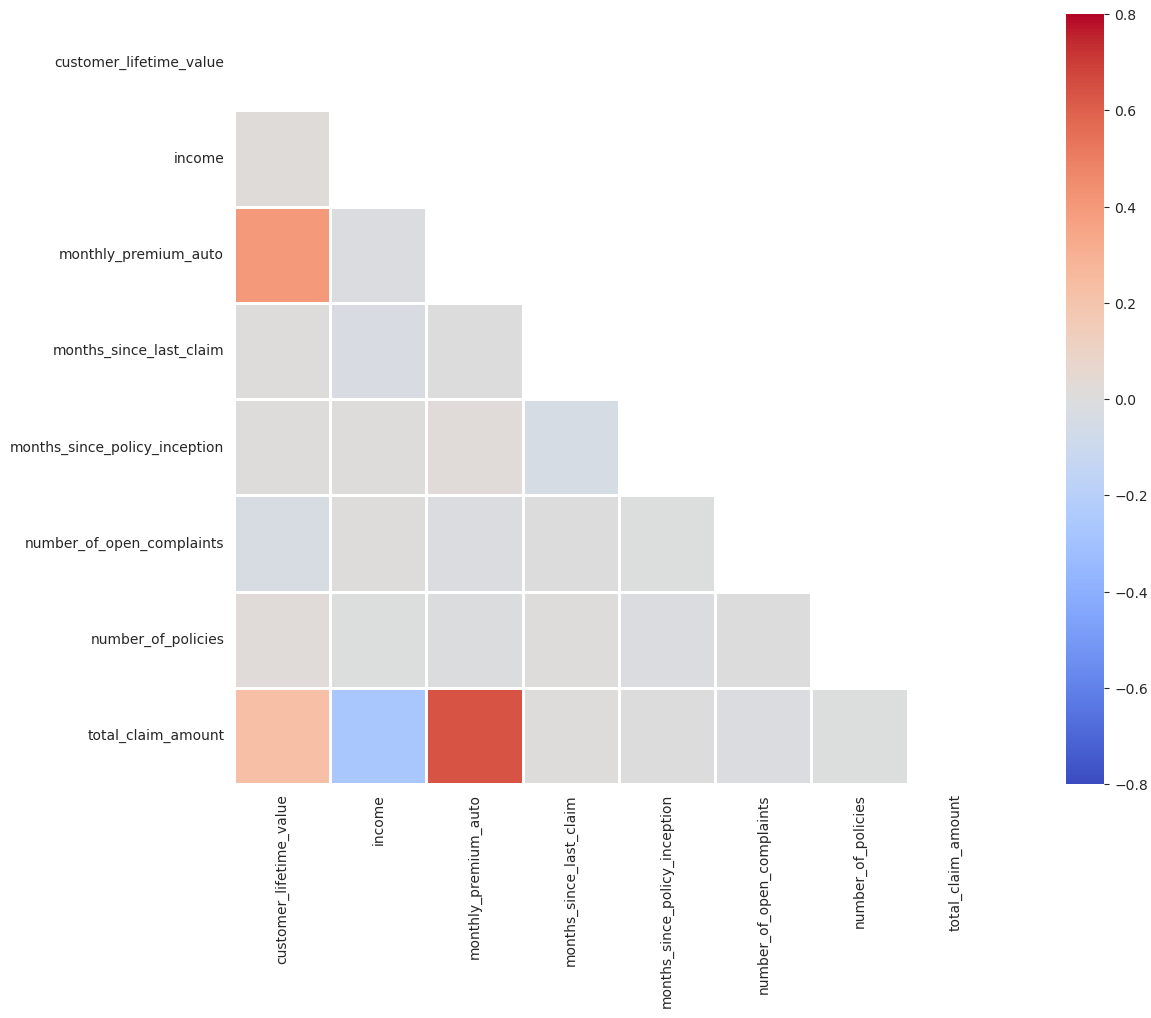

In [57]:

mask = np.zeros_like(numericals.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(numericals.corr(), mask=mask,
                     square=True, linewidths=1, cmap="coolwarm",
                     vmax = 0.8, vmin = -0.8)


In [58]:
# Discrete


In [59]:

#  barplots from discrete data

def df_bar(df):
    sns.set(rc={'figure.figsize':(16,8)})
    for i, col in enumerate(df):
        plt.figure(i)
        sns.barplot(x = df[col].value_counts().index, y = df[col].value_counts())
        
    plt.show()




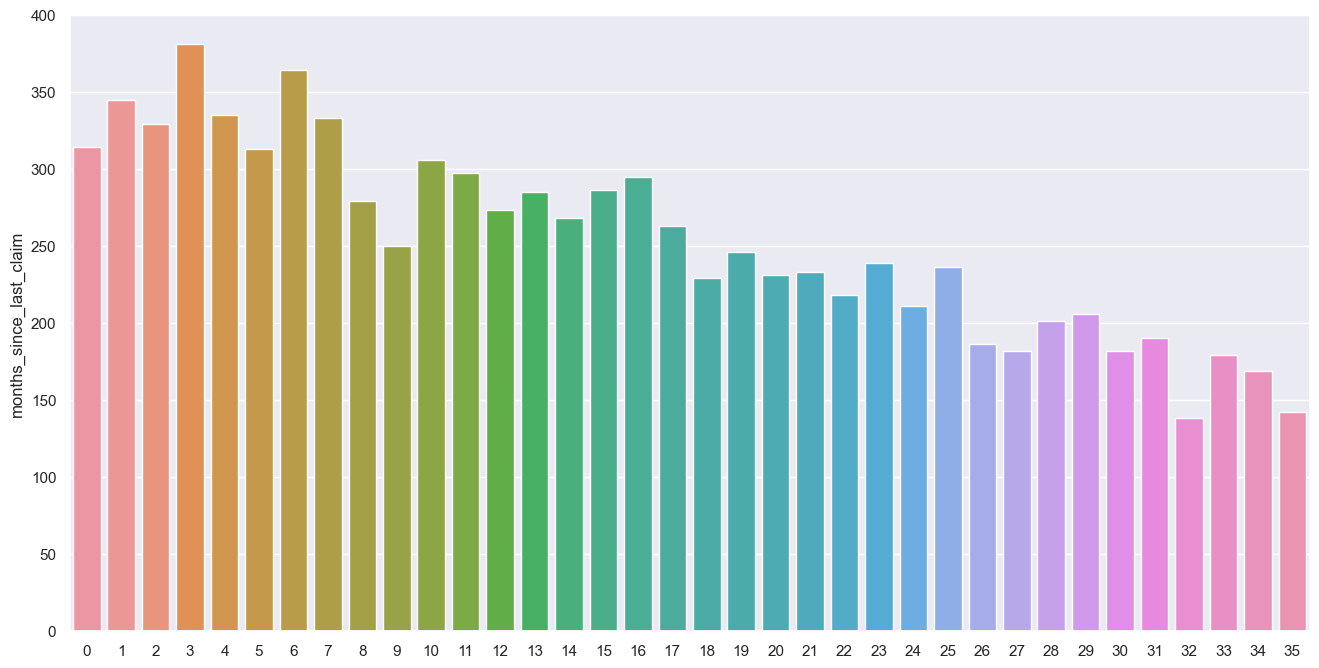

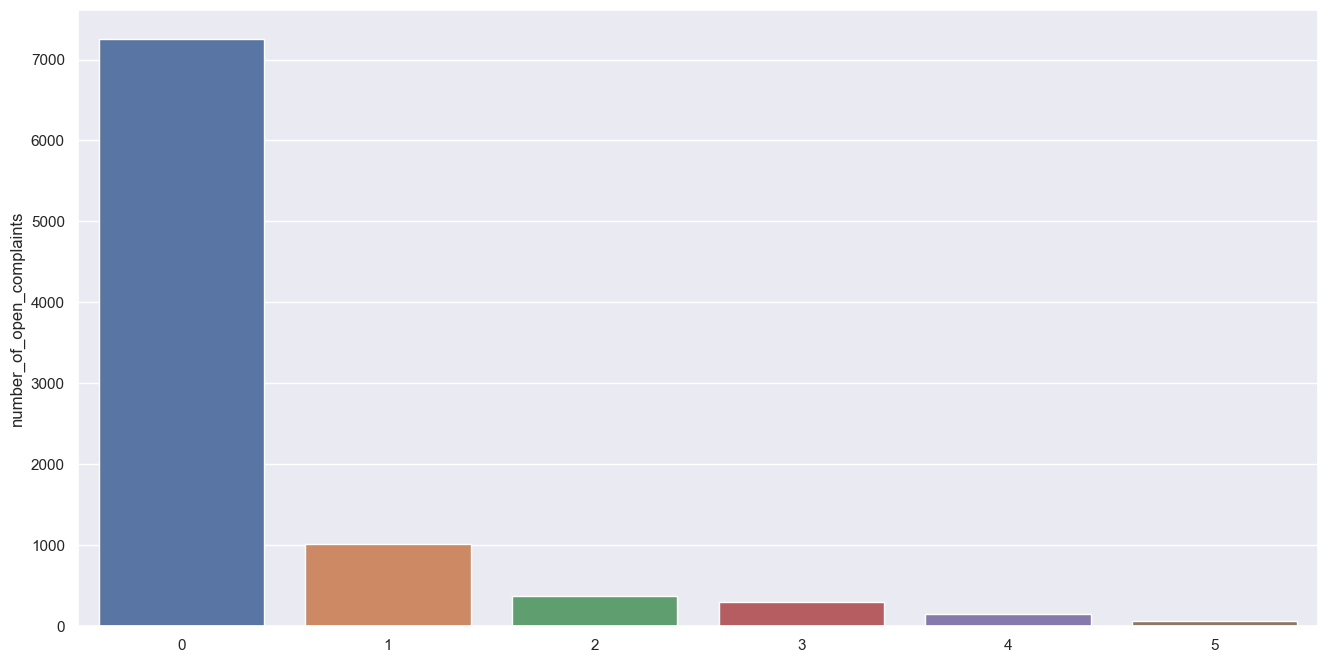

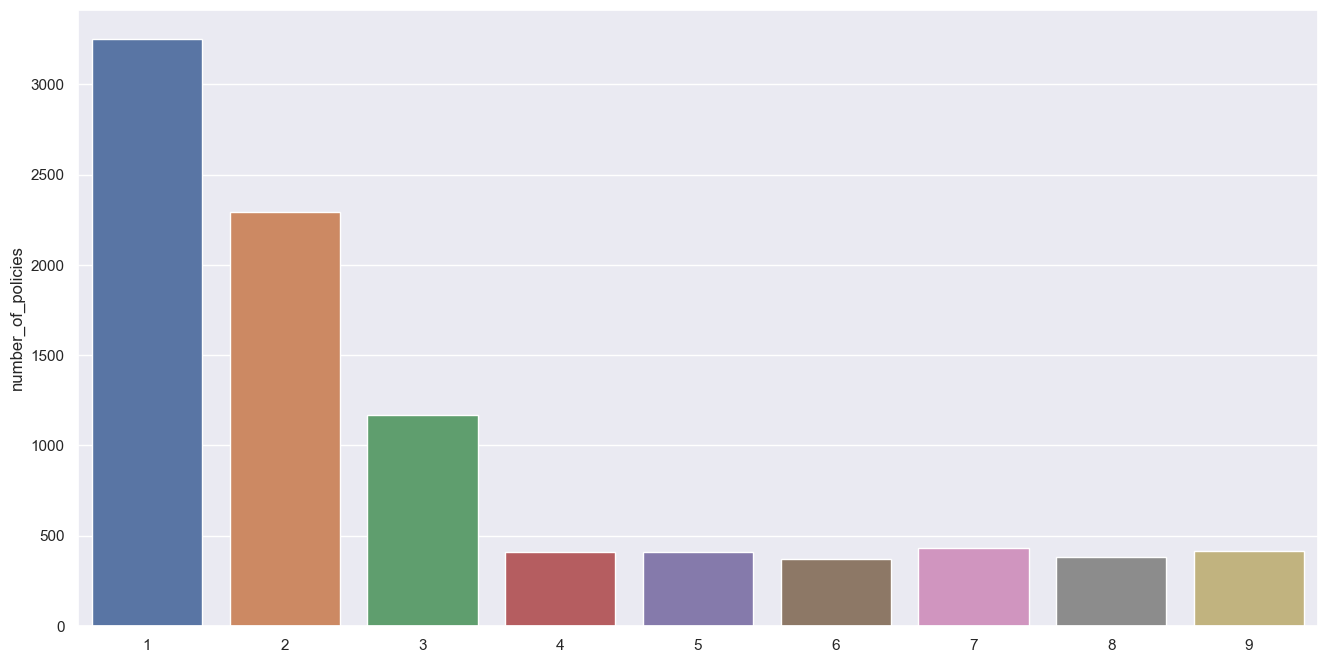

In [60]:

df_bar(discrete_df)


In [61]:
def df_hist(df):
    sns.set(rc={'figure.figsize':(16,8)})
    for i, col in enumerate(df):
        plt.figure(i)
        sns.distplot(df[col], color = list(BASE_COLORS.keys())[i])
        
    plt.show()



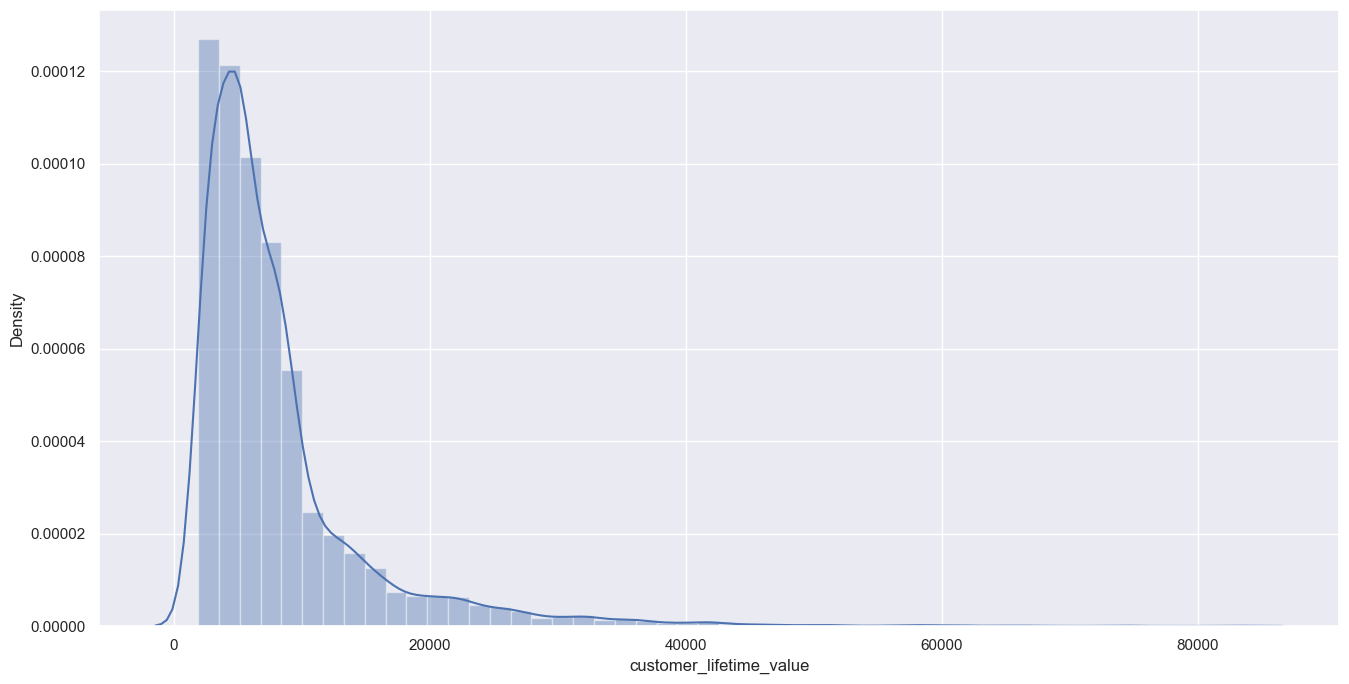

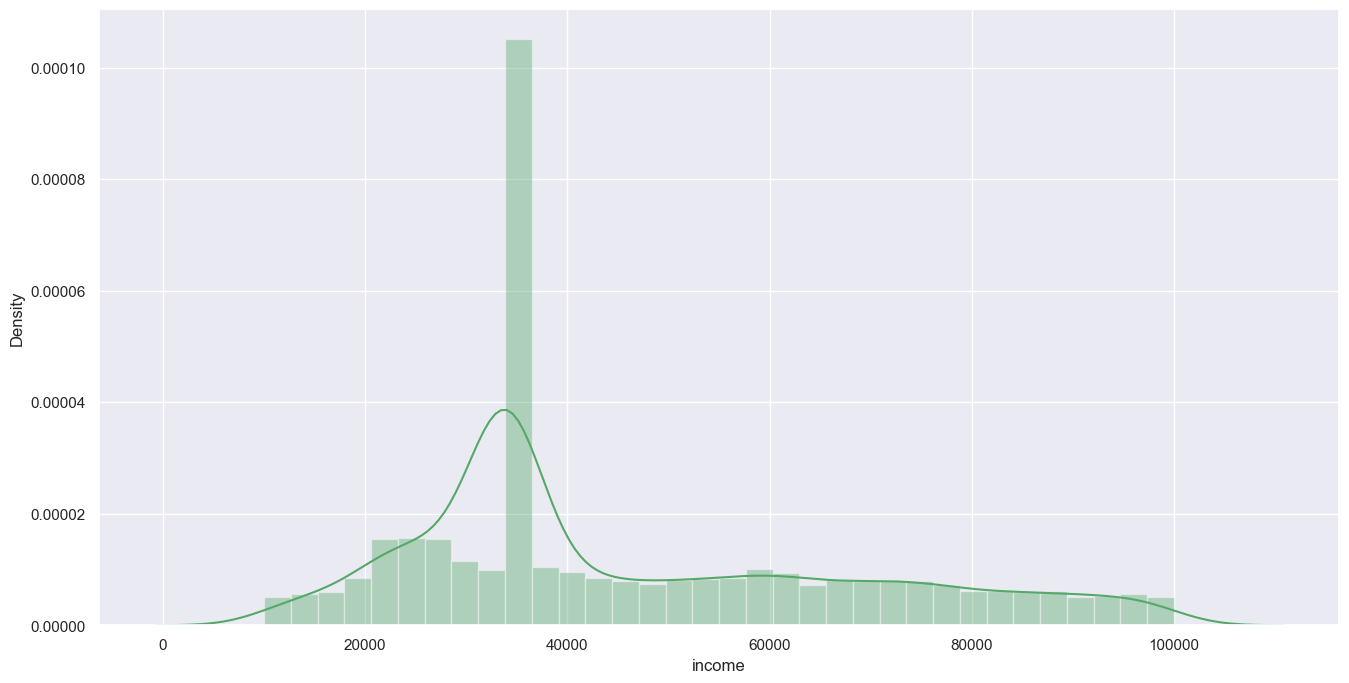

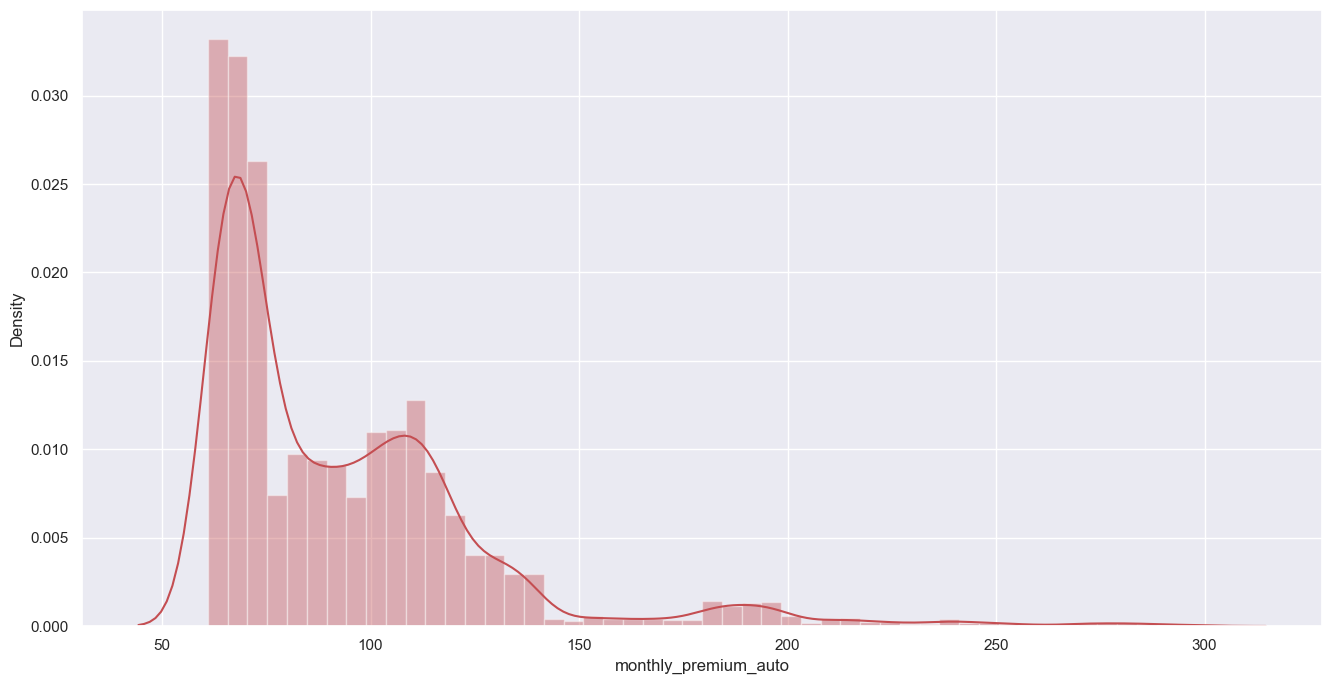

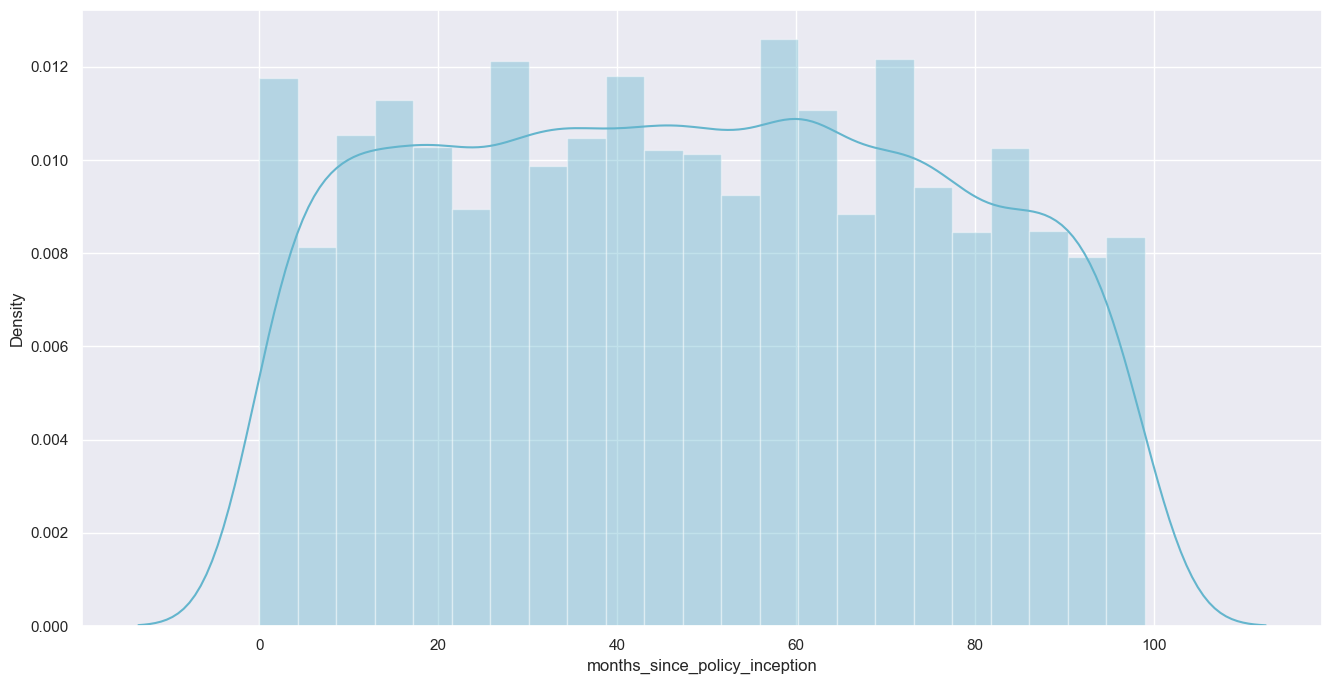

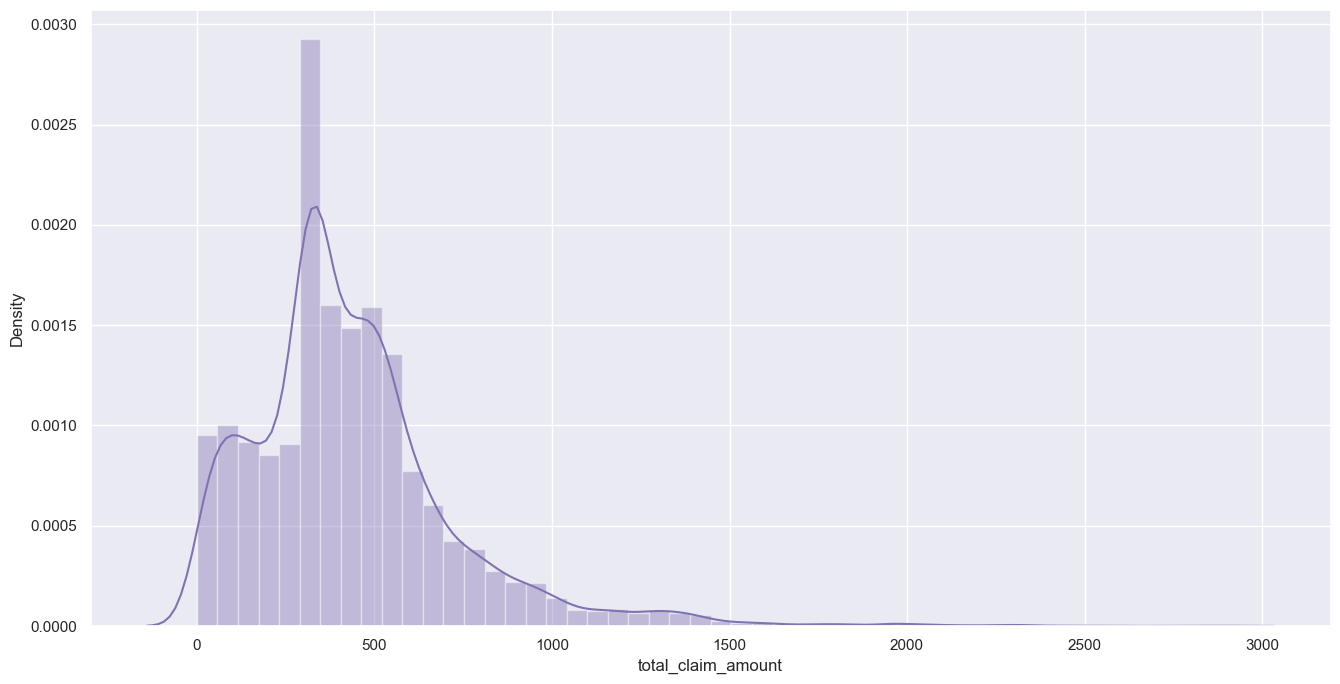

In [62]:

df_hist(continuous_df)


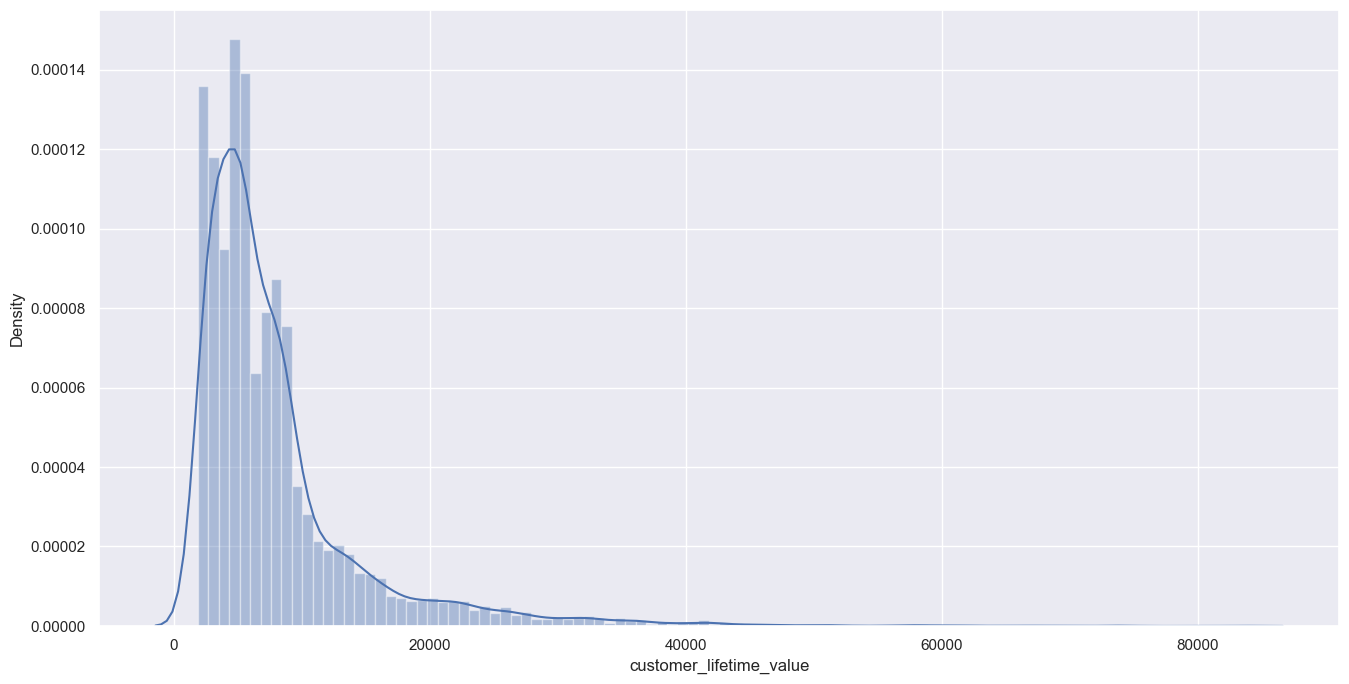

In [64]:

sns.distplot(continuous_df["customer_lifetime_value"], bins = 100);

In [65]:

continuous_df["customer_lifetime_value"].value_counts()

7200.664877     6
17497.522010    6
2248.449633     6
8092.876960     6
6057.072080     6
               ..
9162.063169     1
2374.147419     1
6874.848270     1
9934.865795     1
2611.836866     1
Name: customer_lifetime_value, Length: 8041, dtype: int64

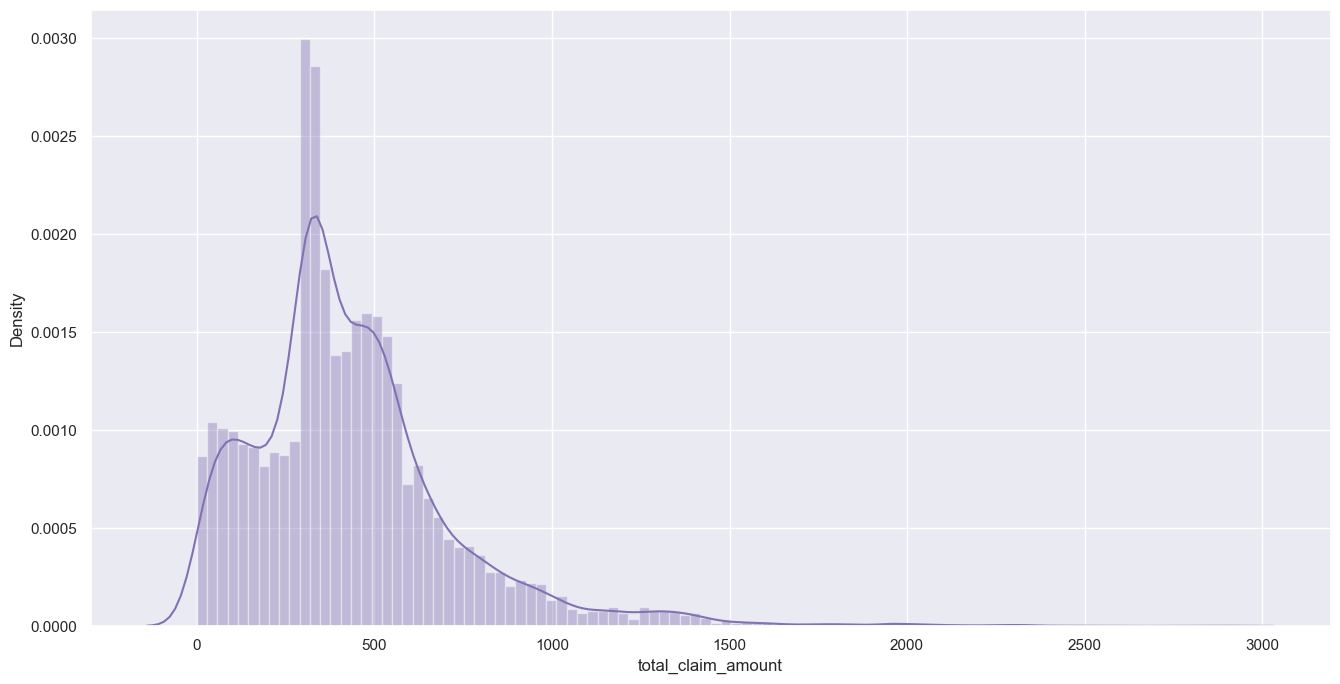

In [66]:

sns.distplot(continuous_df["total_claim_amount"], bins = 100, color = list(BASE_COLORS.keys())[4]);


In [67]:
continuous_df["total_claim_amount"].value_counts()


316.800000    116
292.800000    110
312.000000    108
350.400000    105
331.200000    102
             ... 
377.442796      1
20.985105       1
280.897050      1
268.130863      1
790.784983      1
Name: total_claim_amount, Length: 5106, dtype: int64

In [68]:
# Distribution is ok,  no nans were replaced.

# 6. Look for outliers in the continuous variables we have found. Hint: There is a good plot to do that.

In [69]:

continuous[:3]


['customer_lifetime_value', 'income', 'monthly_premium_auto']

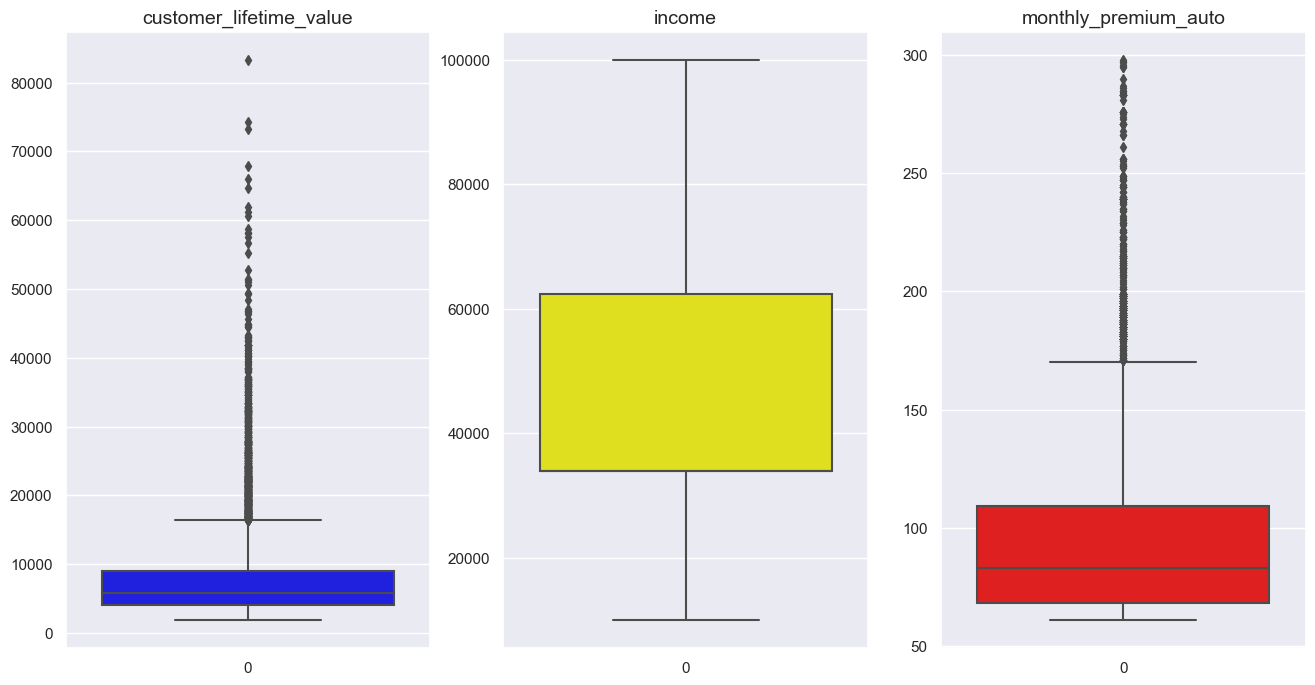

In [70]:

box_colors = ["blue", "yellow", "red"]

f, ax = plt.subplots(1, 3, figsize=(16,8))


for i, col in enumerate(continuous[:3]):
    sns.boxplot(data = continuous_df[col], ax = ax[i], color = box_colors[i])
    ax[i].set_title(col, fontsize = 14)
plt.show();


In [72]:
#  outliers in customer lifetime vaulue + monthly_premium_auto

In [ ]:
# Lab | Cleaning categorical data
# For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder. In this lab we will explore categorical data.

# Instructions
# 1.Import the necessary libraries if you are starting a new notebook. Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv

# 2.Find all of the categorical data. Save it in a categorical_df variable.

# 3.Check for NaN values.

# 4.Check all unique values of columns.

# 5.Check dtypes. Do they all make sense as categorical data?

# 6.Does any column contain alpha and numeric data? Decide how to clean it.

# 7.Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.

# 8.Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

# 9.Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.
